In [ ]:
import numpy as np
import matplotlib.pyplot as plt


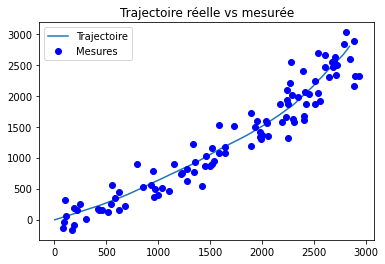

Erreur quadratique moyenne :70.52505494706111


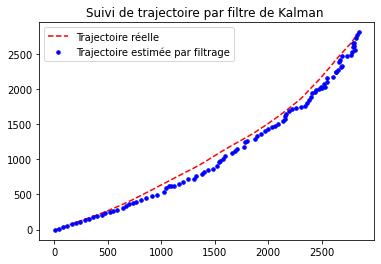

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


T_e = 1
T = 100
sigma_Q = 1
sigma_px = 150
sigma_py = 150
F = np.array([[1, T_e, 0, 0], [0, 1, 0, 0], [0, 0, 1, T_e], [0, 0, 0, 1]])
R = np.array([[sigma_px**2, 0], [0, sigma_px**2]])
H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
Q = sigma_Q**2*np.array([[(T_e**3)/3, (T_e**2)/2, 0, 0], [(T_e**2)/2, T_e, 0, 0], [0, 0, (T_e**3)/3, (T_e**2)/2], [0, 0, (T_e**2)/2, T_e]])
U = np.random.multivariate_normal(np.zeros(4), Q)
V = np.random.multivariate_normal(np.zeros(2), R)
x_init0 = np.array([3, 40, -4, 20])
x_init = np.transpose(x_init0)
x_kalm = x_init
P_kalm = np.identity(4)


def creer_trajectoire(F, Q, x_init, T): 
  vecteur_x = np.zeros((4, T))
  vecteur_x[:, 0] = x_init
  for k in range(1, T, 1) : 
    U = np.random.multivariate_normal(np.zeros(4), Q)
    vecteur_x[:, k] = F@vecteur_x[:, k-1] + U
  return vecteur_x

vecteur_x = creer_trajectoire(F, Q, x_init, T)

def creer_observations(H, R, vecteur_x, T):
  vecteur_y = np.zeros((2, T))
  for k in range(T) : 
    V = np.random.multivariate_normal(np.zeros(2), R)
    vecteur_y[:, k] = H@vecteur_x[:, k] + V
  return vecteur_y

vecteur_y = creer_observations(H, R, vecteur_x, T)
#print(vecteur_y)
plt.plot(vecteur_x[0, :], vecteur_x[2, :],label="Trajectoire")
plt.plot(vecteur_y[0, :], vecteur_y[1, :], 'bo',label="Mesures")
plt.legend()
plt.title("Trajectoire réelle vs mesurée")
plt.show()


def filtre_kalman(F, Q, H, R, vecteur_y,k, x_kalm_prec, P_kalm_prec):
  p_k_k_1 = Q + F@P_kalm_prec@np.transpose(F)
  K = p_k_k_1@np.transpose(H)@np.linalg.inv((H@p_k_k_1@np.transpose(H) + R))
  x_k_k_1 = F@x_kalm_prec
  P_kalm_k = (np.identity(4) - K@H)@p_k_k_1
  #print(P_kalm_k.shape)
  x_kalm_k = np.transpose(x_k_k_1) + K@(vecteur_y[:, k] - H@np.transpose(x_k_k_1))
  return(x_kalm_k, P_kalm_k)

x_kalm_k, P_kalm_k = filtre_kalman(F, Q, H, R, vecteur_y,4, x_init, np.identity(4))
#print(x_kalm_k, P_kalm_k)

def test_kalman(vecteur_y,F,Q,H,R,T,x_init) :
    x_est = np.zeros((4,T))
    x_est[:,0] = x_init.reshape(4,)
    P_kalm = np.eye(4)
    x_kalm = x_init
    
    for j in range(1, T) :
        x_kalm, P_kalm =  filtre_kalman(F,Q,H,R,vecteur_y,j,x_kalm,P_kalm)
        x_est[:,j] = x_kalm.reshape(4,)
        #print(x_kalm.shape)

    
    return x_est
x_est = test_kalman(vecteur_y,F,Q,H,R,T,x_init)

def  err_quadra(k,vecteur_x, x_est ) :
    return np.transpose((vecteur_x[:,k] - x_est[:,k]))@(vecteur_x[:,k] - x_est[:,k])

def err_moy(T,vecteur_x, x_est) :
    s=0
    for i in range(1,T) :
        s+= (err_quadra(i,vecteur_x, x_est ))**(1/2)
    return (1/T)*s

print("Erreur quadratique moyenne :" + str(err_moy(T,vecteur_x, x_est)))

plt.plot(vecteur_x[0,:],vecteur_x[2,:], 'r--', label="Trajectoire réelle")
plt.plot(x_est[0,:], x_est[2,:], 'bo', markersize=3.5, label="Trajectoire estimée par filtrage")
plt.legend()

plt.title("Suivi de trajectoire par filtre de Kalman ")




plt.show()




